In [116]:
import matplotlib.pyplot as plt
import numpy as np

(-10.0, 10.0)

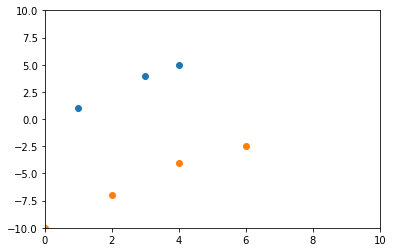

In [118]:
plt.scatter(i[0], i[1])
plt.scatter(j[0], j[1])
plt.xlim(0,10)
plt.ylim(-10,10)

In [119]:
def Sum_xy (c):
    return sum([x*y for x,y in zip(c[0],c[1])])

def Sum_x2 (c):
    return sum([x**2 for x in c[0]])

In [120]:
m = ((len(i[0]) - len(j[0])) * (Sum_xy(i) - Sum_xy(j)) - (sum(i[0]) - sum(j[0])*(sum(i[1]) - sum(j[1]))))/ \
    ((len(i) - len(j))* (Sum_x2(i) - Sum_x2(j)) - ((sum(i[0]))**2 - (sum(j[0]))**2))
m

3.95

In [121]:
b = ((sum(i[1]) - sum(j[1])) - m * (sum(i[0]) - sum(j[0]))) / \
    (len(i[0]) - len(j[0]))
b

-49.3

0.9999999999999609

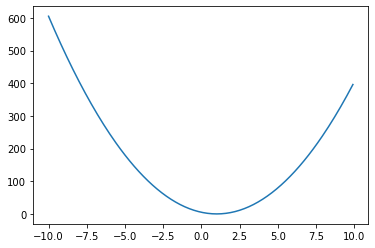

In [338]:
xvals = np.arange(-10,10,.1)
yvals = residual(xvals, 0)


plt.plot(xvals, yvals)

xvals[np.where(yvals== min(yvals))[0][0]]

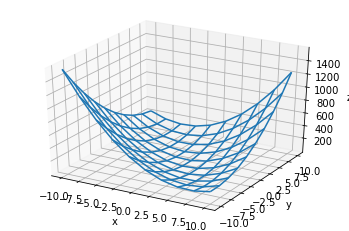

In [339]:

def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))



fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [614]:
A = [[1, 2, 3], [1, 2, 3]]
#j = [[-100,-101,-102], [-100,-101,-102]]
B = ([0, 4, 5], [0, 4, 5])

In [615]:
def residual (x):
    m = x[0]
    b = x[1]
    #return(sum([(j[1][k] - (m*j[0][k] + b))**2 for k in range(len(j[0]))]))
    return sum([(A[1][k] - (m*A[0][k] + b))**2 for k in range(len(A[0]))]) \
        + 1 / sum([(B[1][k] - (m*B[0][k] + b))**2 for k in range(len(B[0]))])

In [637]:
x = np.linspace(-10, 10, 10000)
y = np.linspace(-10, 10, 10000)

X, Y = np.meshgrid(x, y)
Z = residual([X, Y])

coords = np.where(Z == np.min(Z))
print(coords)

# why is it flipped??
b = x[coords[0][0]]
m = y[coords[1][0]]


print(m)
print(b)

(array([5380]), array([5296]))
0.5930593059305931
0.7610761076107604


(-1.0, 10.0)

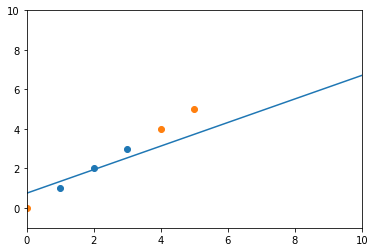

In [618]:
x = np.linspace(0, 10, 100)

plt.scatter(A[0], A[1])
plt.scatter(B[0], B[1])

plt.plot(x, m*x+b)

plt.xlim(0,10)
plt.ylim(-1,10)

In [759]:
A = [[1, 2, 3], [1, 2, 3]]
#j = [[-100,-101,-102], [-100,-101,-102]]
B = ([0, 4, 5], [0, 4, 5])

In [760]:
def residual (x):
    m = x[0]
    b = x[1]
    #return(sum([(j[1][k] - (m*j[0][k] + b))**2 for k in range(len(j[0]))]))
    return sum([(A[1][k] - (m*A[0][k] + b))**2 for k in range(len(A[0]))]) \
        + 1 / sum([(B[1][k] - (m*B[0][k] + b))**2 for k in range(len(B[0]))])

In [761]:
m, b = (1,1)
[(A[1][k]) for k in range(len(A[0]))]

[1, 2, 3]

In [762]:
from scipy import optimize

x = np.ones(2)
for i in range(100):
    #x = np.array([.9, .1])
    #eps = np.sqrt(np.finfo(float).eps)
    eps = np.float(1e-2)
    g = optimize.approx_fprime(x, residual, eps)
    x -= g*eps
print(x)



[0.57685477 0.79894804]


[-0.87713449  4.87713449] [-0.62211785  4.55545118] [-1.13215113  5.19881779]


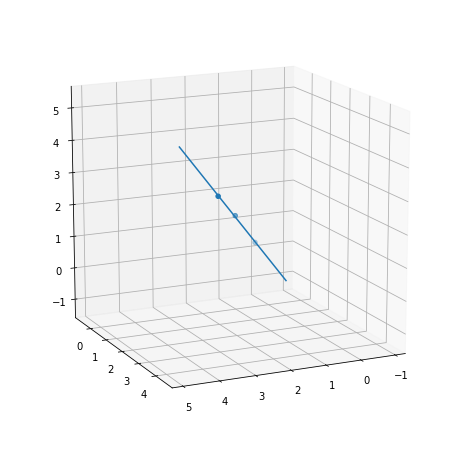

In [1386]:
def cross(a, b):
    c = [a[1]*b[2] - a[2]*b[1],
         a[2]*b[0] - a[0]*b[2],
         a[0]*b[1] - a[1]*b[0]]
    return c

In [1387]:
A = [[1, 2, 3], [1.1, 1.9, 2.9], [.9,2.1,3.1]]
#j = [[-100,-101,-102], [-100,-101,-102]]
B = [[0, 4, 5], [.1, 3.9, 5.1], [-.1, 4.1, 4.9]]

In [1388]:
def ptsfromline(pts, linepts):
    
    dlist = []
    
    a = linepts[0]
    b = linepts[1]
    
    for i in range(len(pts[0])):

        p = np.array([pts[0][i], pts[1][i], pts[2][i]])
        d = np.linalg.norm(cross(p-a, p-b)) / np.linalg.norm(b-a)

        dlist.append(d)
    
    return dlist

# x = [p0,p1,p2,v0,v1,v2]
def cost (x): 
    p = x[:3]
    v = x[3:]
    
    linepts = v * np.mgrid[-.5:.5:2j][:, np.newaxis] + p
    
    Alist = ptsfromline(A, linepts)
    Blist = ptsfromline(B, linepts)
    
    #print(Alist)
    #print(Blist)
    
    return sum([d**2 for d in Alist]) + (1/10) * 1 / sum([d**2 for d in Blist])
    
    
    
    #return(sum([(j[1][k] - (m*j[0][k] + b))**2 for k in range(len(j[0]))]))
    return sum([(A[1][k] - (m*A[0][k] + b))**2 for k in range(len(A[0]))]) \
        + 1 / sum([(B[1][k] - (m*B[0][k] + b))**2 for k in range(len(B[0]))])

In [1389]:
data  = np.array(A).T

datamean = data.mean(axis=0)
# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

cost(np.append(vv[0], datamean))

0.7156219314857024

[-0.87713449  4.87713449] [-0.62211785  4.55545118] [-1.13215113  5.19881779]


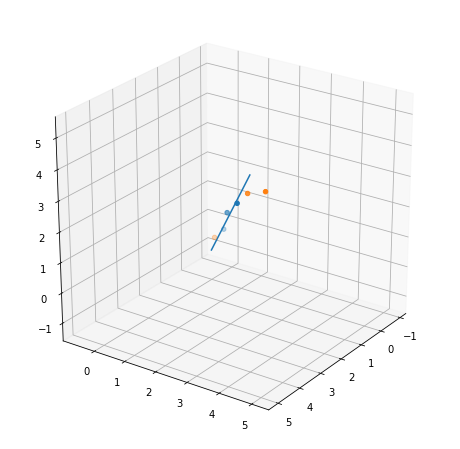

In [1402]:
linepts = vv[0] * np.mgrid[-5:5:2j][:, np.newaxis] + datamean
print(*linepts.T)


plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter3D(*A)
ax.scatter3D(*B)

ax.plot3D(*linepts.T)

ax.view_init(25, 35)

#plt.xlim(0,10)
#plt.ylim(-1,10)

In [1391]:
from scipy import optimize

#x = np.ones(6)
x = np.append(vv[0], datamean)

for i in range(500):
    #x = np.array([.9, .1])
    #eps = np.sqrt(np.finfo(float).eps)
    eps = np.float(1e-2)
    g = optimize.approx_fprime(x, cost, eps)
    x -= g*eps

p = x[:3]
v = x[3:]
linepts = v * np.mgrid[-5:5:2j][:, np.newaxis] + p
linepts

array([[ -9.00667867,  -6.86107919, -10.94044391],
       [  9.99737083,   8.35133644,  11.48766156]])

(-5.0, 5.0)

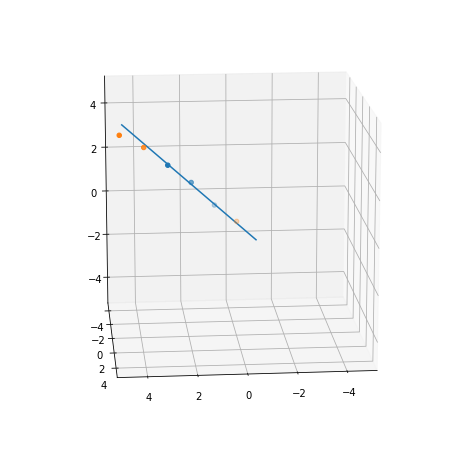

In [1406]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter3D(*A)
ax.scatter3D(*B)

ax.plot3D(*linepts.T)

ax.view_init(15, 85)


plt.xlim(-5,5)
plt.ylim(-5,5)
ax.set_zlim(-5,5)

In [3940]:
%run MonteCarlo.ipynb
mc = MonteCarlo(100, "box")

In [3941]:
%run DataAnalysis.ipynb

da1 = DataAnalysis()
da1.set_eventdf(mc.get_eventdf())
da1.arrange_clusters().make_clusterdf()
da1.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,13,13,3.340025e+03,0.0,1.021085,0.961496,-0.966719,0,2
1,1,11,11,9.909339e+04,0.0,1.008654,1.415153,0.487174,0,2
2,2,13,13,1.034913e+05,0.0,0.763234,0.778802,0.014285,0,1
3,3,8,8,1.360902e+05,0.0,0.711796,1.294097,-0.751455,0,0
4,4,8,8,1.588615e+05,0.0,0.795465,1.017602,0.869509,0,0
...,...,...,...,...,...,...,...,...,...,...
90,90,6,6,2.683625e+06,0.0,0.633713,0.303648,-0.780322,6,0
91,91,9,9,2.717580e+06,0.0,0.724580,1.570796,-0.770757,0,1
92,92,6,6,2.717816e+06,0.0,0.555238,1.315062,0.790594,0,0
93,93,7,7,2.731402e+06,0.0,0.650979,1.570796,-0.844130,1,0


In [3944]:

%run DataAnalysis-Copy4.ipynb

da2 = testDataAnalysis()
da2.set_eventdf(mc.get_eventdf())
da2.arrange_clusters()

In [3946]:
da2.make_clusterdf()
da2.get_clusterdf()

NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR
NSGA2 failure...defaulting to LSR


,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,13,13,3.340025e+03,0.0,1.069504,0.988176,-0.992082,0,2
1,1,11,11,9.909339e+04,0.0,1.020738,1.433241,0.487196,0,0
2,2,13,13,1.034913e+05,0.0,0.783665,0.784829,-0.011845,0,1
3,3,8,8,1.360902e+05,0.0,0.765174,1.321900,-0.755869,0,0
4,4,8,8,1.588615e+05,0.0,0.852447,1.032340,0.908458,0,0
...,...,...,...,...,...,...,...,...,...,...
90,90,6,6,2.683625e+06,0.0,4.305764,0.197036,-1.299976,0,3
91,91,9,9,2.717580e+06,0.0,0.755781,1.562588,-0.784773,0,0
92,92,6,6,2.717816e+06,0.0,0.563268,1.304502,0.787863,0,0
93,93,7,7,2.731402e+06,0.0,0.672588,1.567945,-0.824716,0,0


In [ ]:
mc.get_clusterdf()

In [2435]:
hitlist = ptsfromline(hit_pts, linepts)
misslist = ptsfromline(miss_pts, linepts)

#return sum([d**2 for d in hitlist]) - 1/25 * (sum([d**2 for d in misslist]))

In [3821]:
%run MonteCarlo.ipynb
mc = MonteCarlo(100, "box")

%run DataAnalysis.ipynb

da1 = DataAnalysis()
da1.set_eventdf(mc.get_eventdf())
da1.arrange_clusters().make_clusterdf()
da1.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,5,5,2.455889e+04,0.0,0.740159,0.885512,1.335988,3,0
1,1,14,14,3.243721e+04,0.0,1.006241,0.575264,-0.230910,0,0
2,2,8,8,3.422421e+04,0.0,0.637244,0.347205,0.096298,0,0
3,3,7,7,8.973810e+04,0.0,0.989350,0.969119,-0.539085,3,1
4,4,11,11,9.024022e+04,0.0,0.919681,0.867140,1.425551,1,1
...,...,...,...,...,...,...,...,...,...,...
88,88,7,7,2.612412e+06,0.0,0.886096,1.342184,-0.564300,1,0
89,89,8,8,2.693072e+06,0.0,0.945417,0.679026,-1.226729,1,1
90,90,10,10,2.707908e+06,0.0,1.020871,0.576510,-1.231414,1,1
91,91,8,8,2.739832e+06,0.0,0.890162,0.976444,-1.389792,1,0


In [3822]:
%run DataAnalysis-Copy4.ipynb

da2 = testDataAnalysis()
da2.set_eventdf(mc.get_eventdf())
da2.arrange_clusters().make_clusterdf()
da2.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,5,5,2.455889e+04,0.0,1.043990,0.905277,1.422115,0,0
1,1,14,14,3.243721e+04,0.0,1.040686,0.572012,-0.184024,0,1
2,2,8,8,3.422421e+04,0.0,0.736815,0.360476,0.020403,0,0
3,3,7,7,8.973810e+04,0.0,1.056897,0.982735,-0.531886,0,1
4,4,11,11,9.024022e+04,0.0,0.948490,0.863518,1.407837,0,0
...,...,...,...,...,...,...,...,...,...,...
88,88,7,7,2.612412e+06,0.0,0.977929,1.372560,-0.597069,0,1
89,89,8,8,2.693072e+06,0.0,1.018951,0.711980,-1.153375,0,0
90,90,10,10,2.707908e+06,0.0,1.846870,0.600478,-1.460809,0,5
91,91,8,8,2.739832e+06,0.0,0.989802,1.000032,-1.328759,0,1


In [3818]:
mc.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,8,8,1.666932e+05,0.0,0.970009,1.487544,-1.265740,0,0
1,1,11,11,1.044134e+06,0.0,1.007009,0.591984,0.253879,0,0
2,2,13,13,1.255709e+06,0.0,0.914800,0.729430,1.144370,0,0
3,3,6,6,2.088342e+06,0.0,0.777167,1.502533,-0.977605,0,0
4,4,5,5,2.175190e+06,0.0,1.068817,0.248498,-1.408020,0,0


In [3785]:
cluster = da2.get_cluster(1)

In [3786]:
#all_linepts = np.tile(linepts.T, (3,1,1))
def ptsfromline( pts, linepts):
    
    #dlist = []
    a = linepts.T[:,:1]
    b = linepts.T[:,1:]

    #print(np.linalg.norm(b-a, axis=0))

    d = np.linalg.norm(np.cross(pts - a, pts-b, axis=0), axis=0) / np.linalg.norm(b-a, axis=0)
        
    return d


In [3787]:
def hitcost (x, hit_pts): 
    
    costs = []
    
    for line in x:
        cubeLength = 50
        inside = cubeLength/2*np.sqrt(3)
        
        bound = (cubeLength + inside) / 2

        p = line[:3]
        v = line[3:]

        linepts = v * np.mgrid[-.5:.5:2j][:, np.newaxis] + p

        hitlist = ptsfromline(hit_pts, linepts)

        #return sum([d**2 for d in hitlist]) + sum([inside**4/d**2 for d in misslist])
        
        linecost =  sum([1/(1 + np.exp(-.1*(d-42))) for d in hitlist]) 
        costs.append(linecost)
    return costs

def misscost (x, miss_pts): 
    
    costs = []
    
    for line in x:
        cubeLength = 50
        inside = cubeLength/2*np.sqrt(3)
        
        bound = (cubeLength + inside) / 2

        p = line[:3]
        v = line[3:]

        linepts = v * np.mgrid[-.5:.5:2j][:, np.newaxis] + p

        misslist = ptsfromline(miss_pts, linepts)

        #return sum([d**2 for d in hitlist]) + sum([inside**4/d**2 for d in misslist])
        
        linecost =  sum([1/(1 + np.exp(.1*(d-25))) for d in misslist])
        costs.append(linecost)
    return costs

In [3788]:
hit_chs = cluster['Channel'].values
hit_pts = np.array([DataAnalysis().coords[pt] for pt in hit_chs]).T

miss_chs = [ch for ch in range(1,989) if ch not in hit_chs]
#miss_chs = testDataAnalysis().channelcollisions(da1.fitline(da1.get_cluster(2)))[1]
miss_pts = np.array([DataAnalysis().coords[pt] for pt in miss_chs]).T

In [3789]:
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class MyProblem(Problem):

    def __init__(self, hit_pts, miss_pts):
        super().__init__(n_var=6,
                         n_obj=2,
                         n_constr=0,
                         xl=np.array([-350,-350,-350,-350,-350,-350]),
                         xu=np.array([350,350,350,350,350,350]))

    def _evaluate(self, x, out, *args, **kwargs):
        
        f1 = hitcost(x, hit_pts)
        f2 = misscost(x, miss_pts)
                      
        out["F"] = np.column_stack([f1, f2])
        
        #g1 = 2*(x[:, 0]-0.1) * (x[:, 0]-0.9) / 0.18
        #g2 = - 20*(x[:, 0]-0.4) * (x[:, 0]-0.6) / 4.8
        
        
        #out["G"] = np.column_stack([g1, g2])

In [3790]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)


In [3791]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 1000)

In [3792]:
from pymoo.optimize import minimize

problem = MyProblem(hit_pts, miss_pts)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               pf=problem.pareto_front(use_cache=False))#,
               #save_history=True)
               #verbose=True)

In [3793]:
f = res.F[:,0] + res.F[:,1]


In [3794]:
res.F[:,0] + res.F[:,1]

array([ 3.6007209 , 11.00000133,  5.80078169,  3.5875009 ,  5.47779608,
        5.67903638,  7.40620734,  7.1944361 ,  6.72491526,  5.42643029,
        5.16740538, 10.14993625,  5.91174091,  5.21429019,  5.25066671,
        5.28203056,  6.57639604,  5.37634663,  5.58964095, 10.38137468,
        9.57282144,  8.4665225 ,  6.88175165,  5.6212667 ,  7.86565793,
        8.57455217,  5.14519788,  5.15712374,  5.14825942, 10.72438057,
        5.36523709,  8.02285796,  8.29534748,  5.33513182,  5.23005558,
        5.36316316, 10.52681893,  5.25168195,  5.21431382,  5.31015486,
        8.72675441,  7.76595262,  8.14220448,  6.07815111,  9.74754431,
        5.21996091,  8.84139247,  5.55978862,  7.06865639,  6.17415889,
        5.70904316,  5.14258477,  7.52945424,  5.1608596 ,  5.21683948,
        9.97129787,  5.78724715,  5.49892066,  5.39440652,  5.15172147,
        7.6348072 ,  5.49899957,  5.31873407,  6.01308806,  5.74806102,
        5.14704162,  5.7876488 ,  8.97149164, 10.88039172,  5.63

In [3795]:
bestlinepts = []
bestscore = np.inf

for i in range(10):

    index = np.where(f==sorted(f)[i])[0][0]
    
    betterline = res.X[index]
    betterlinepts = betterline[3:] * np.mgrid[-.5:.5:2j][:, np.newaxis] + betterline[:3]

    #actually_hit_chs, actually_miss_chs = testDataAnalysis().channelcollisions(betterlinepts)
    
    extra, missed = testDataAnalysis().errorchannels(cluster, betterlinepts)
    
    
    print(bestscore)
    
    if len(extra) + len(missed) < bestscore:
        bestlinepts = betterlinepts
        bestscore = len(extra) + len(missed)

inf
1
1
1
1
1
1
1
1
1


In [3802]:
best_extra, best_missed = testDataAnalysis().errorchannels(cluster, bestlinepts)

print('Num missed ch: ' + str(len(best_extra)))
print('Num extra  ch: ' + str(len(best_missed)))

Num missed ch: 0
Num extra  ch: 1


In [3797]:
chs = [220, 259, 310, 323, 597, 610, 805, 818]
coords = np.array([DataAnalysis().coords[ch] for ch in chs]).T
coords

array([[ -29.7,  -29.7,  -29.7,  -29.7,  -29.7,  -29.7,  -29.7,  -29.7],
       [ -29.4,   29.4,  176.4,  264.6, -264.6, -323.4, -117.6, -176.4],
       [ 290. ,  290. ,  232. ,  232. ,  290. ,  290. ,  290. ,  290. ]])

In [3798]:
ptsfromline(coords, betterlinepts)

array([398.20353097, 426.50848498, 486.11283434, 537.92636131,
       325.74503496, 321.28671207, 362.24706108, 343.66972109])

In [3799]:
ptsfromline(coords, mc.get_tracks()[2])

array([196.70013296, 209.58975082, 200.70336686, 231.03070096,
       183.04424391, 190.12954278, 183.82307722, 180.26227267])

False

In [3904]:
da1.get_clusterdf().tail(40)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
53,53,8,8,1.608102e+06,0.0,0.919436,0.622682,0.335209,0,0
54,54,7,7,1.641383e+06,0.0,0.953138,1.461385,0.395378,0,1
55,55,7,7,1.654929e+06,0.0,1.003930,1.265238,1.258897,1,1
56,56,6,6,1.756013e+06,0.0,1.092711,1.028188,0.531767,1,0
57,57,11,11,1.763798e+06,0.0,0.842302,0.441319,-0.726038,1,0
58,58,9,9,1.778063e+06,0.0,0.986885,1.407513,-0.539344,2,2
59,59,6,6,1.889124e+06,0.0,0.887383,1.453108,-0.548272,1,0
60,60,9,9,1.901228e+06,0.0,0.771230,0.247624,0.549533,2,0
61,61,8,8,1.904218e+06,0.0,0.849490,1.461149,0.386302,1,0
62,62,5,5,1.909931e+06,0.0,0.897156,0.638980,0.404984,1,0


In [3903]:
da2.get_clusterdf().tail(40)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
53,53,8,8,1.608102e+06,0.0,0.934829,0.645105,0.325427,0,0
54,54,7,7,1.641383e+06,0.0,0.959750,1.468131,0.382921,0,0
55,55,7,7,1.654929e+06,0.0,1.111909,1.281083,1.227674,0,1
56,56,6,6,1.756013e+06,0.0,1.152745,1.006253,0.571622,0,0
57,57,11,11,1.763798e+06,0.0,0.866506,0.440915,-0.757526,1,1
58,58,9,9,1.778063e+06,0.0,1.022849,1.406751,-0.539941,0,0
59,59,6,6,1.889124e+06,0.0,0.956547,1.429831,-0.534043,1,0
60,60,9,9,1.901228e+06,0.0,0.839884,0.234453,0.510740,2,1
61,61,8,8,1.904218e+06,0.0,0.990233,1.491224,0.356208,2,3
62,62,5,5,1.909931e+06,0.0,1.028932,0.638882,0.282237,0,0


(array([65., 25.,  4.,  0.,  1.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 1 Patch objects>)

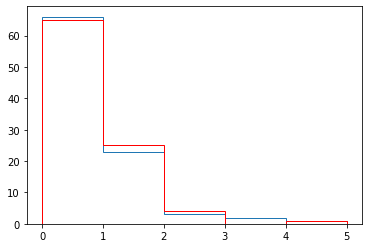

In [3947]:
plt.hist(da2.get_clusterdf()["MissingCh"], np.linspace(0,5,6), histtype='step')
plt.hist(da1.get_clusterdf()["MissingCh"], np.linspace(0,5,6), histtype='step', color='r')

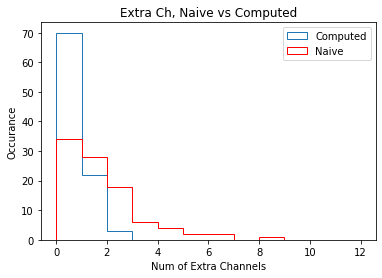

In [3948]:
plt.figure()
plt.title("Extra Ch, Naive vs Computed")
plt.ylabel("Occurance")
plt.xlabel("Num of Extra Channels")
plt.hist(da2.get_clusterdf()["ExtraCh"], np.linspace(0,12,13), histtype='step', label='Computed')
plt.hist(da1.get_clusterdf()["ExtraCh"], np.linspace(0,12,13), color='r', histtype='step', label='Naive')
plt.legend()

In [3967]:
da1.get_clusterdf().head(30)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,13,13,3340.025325,0.0,1.021085,0.961496,-0.966719,0,2
1,1,11,11,99093.392342,0.0,1.008654,1.415153,0.487174,0,2
2,2,13,13,103491.316215,0.0,0.763234,0.778802,0.014285,0,1
3,3,8,8,136090.162061,0.0,0.711796,1.294097,-0.751455,0,0
4,4,8,8,158861.499559,0.0,0.795465,1.017602,0.869509,0,0
5,5,10,10,171433.060889,0.0,0.909707,0.285203,-1.092270,2,1
6,6,9,9,235992.469566,0.0,0.944448,0.680084,1.161718,0,1
7,7,8,8,301598.373523,0.0,0.920006,1.344282,1.329307,1,1
8,8,16,16,327113.190046,0.0,1.038324,0.930628,-0.283425,1,1
9,9,11,11,337363.447294,0.0,0.944425,0.483521,-1.228814,1,1


In [3968]:
da2.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,13,13,3.340025e+03,0.0,1.069504,0.988176,-0.992082,0,2
1,1,11,11,9.909339e+04,0.0,1.020738,1.433241,0.487196,0,0
2,2,13,13,1.034913e+05,0.0,0.783665,0.784829,-0.011845,0,1
3,3,8,8,1.360902e+05,0.0,0.765174,1.321900,-0.755869,0,0
4,4,8,8,1.588615e+05,0.0,0.852447,1.032340,0.908458,0,0
...,...,...,...,...,...,...,...,...,...,...
90,90,6,6,2.683625e+06,0.0,4.305764,0.197036,-1.299976,0,3
91,91,9,9,2.717580e+06,0.0,0.755781,1.562588,-0.784773,0,0
92,92,6,6,2.717816e+06,0.0,0.563268,1.304502,0.787863,0,0
93,93,7,7,2.731402e+06,0.0,0.672588,1.567945,-0.824716,0,0


In [3969]:
mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,13,13,3.340025e+03,0.0,1.058240,0.960505,-0.940325,0,0
1,1,11,11,9.909339e+04,0.0,1.035250,1.445276,0.489882,0,0
2,2,13,13,1.034913e+05,0.0,0.874023,0.782286,0.059172,0,0
3,3,8,8,1.360902e+05,0.0,0.751183,1.310766,-0.768828,0,0
4,4,8,8,1.588615e+05,0.0,0.849934,1.009792,0.896054,0,0
...,...,...,...,...,...,...,...,...,...,...
93,93,6,6,2.683625e+06,0.0,0.726559,0.314631,-0.910496,0,0
94,94,9,9,2.717580e+06,0.0,1.157963,1.568452,-0.753262,0,0
95,95,6,6,2.717816e+06,0.0,0.647809,1.291823,0.775749,0,0
96,96,7,7,2.731402e+06,0.0,0.676643,1.567988,-0.836871,0,0


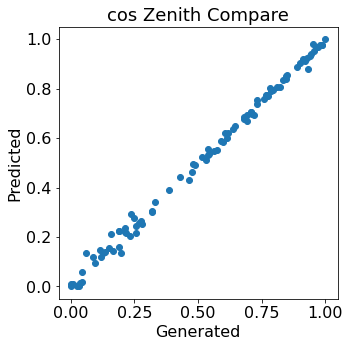

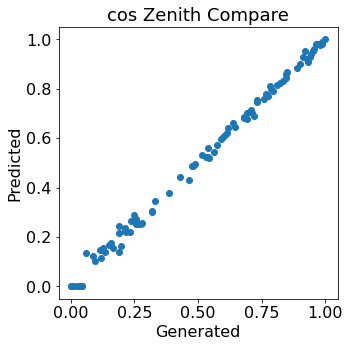

In [4014]:

plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("cos Zenith Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]['Zenith']], [math.cos(x) for x in da2.get_clusterdf()['Zenith']])


plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("cos Zenith Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]['Zenith']], [math.cos(x) for x in da1.get_clusterdf()['Zenith']])




In [4015]:
pred_zenith_deltas = []
naive_zenith_deltas = []

for i in range(len(da2.get_clusterdf())):
    pred = np.cos(da2.get_clusterdf()['Zenith'].values[i])
    naive = np.cos(da1.get_clusterdf()['Zenith'].values[i])
    gen = np.cos(mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]['Zenith'].values[i])
    
    pred_zenith_deltas.append(abs(pred - gen) * 180/np.pi)
    naive_zenith_deltas.append(abs(naive - gen) * 180 / np.pi)
    
print(np.mean(pred_zenith_deltas))
print(np.mean(naive_zenith_deltas))

0.8193773773485701
0.8802344582919389


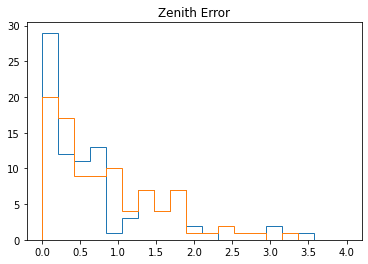

In [4021]:
plt.title("Zenith Error")

plt.hist(pred_zenith_deltas, np.linspace(0,4,20), histtype='step')
array = plt.hist(naive_zenith_deltas, np.linspace(0,4,20), histtype='step')

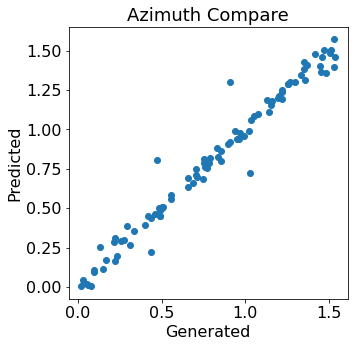

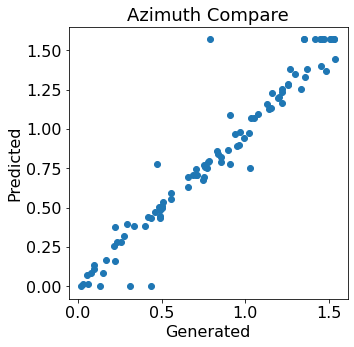

In [4017]:

plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter(abs(mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]['Azimuth']), abs(da2.get_clusterdf()['Azimuth']))

plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter(abs(mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]['Azimuth']), abs(da1.get_clusterdf()['Azimuth']))



In [4018]:
pred_azimuth_deltas = []
naive_azimuth_deltas = []

for i in range(len(da2.get_clusterdf())):
    pred = abs(da2.get_clusterdf()['Azimuth'].values[i])
    naive = abs(da1.get_clusterdf()['Azimuth'].values[i])
    gen = abs(mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 5]['Azimuth'].values[i])
    
    pred_azimuth_deltas.append(abs(pred - gen) * 180/np.pi)
    naive_azimuth_deltas.append(abs(naive - gen) * 180 / np.pi)
    
print(np.mean(pred_azimuth_deltas))
print(np.mean(naive_azimuth_deltas))

2.4891462477816813
3.8362477302640627


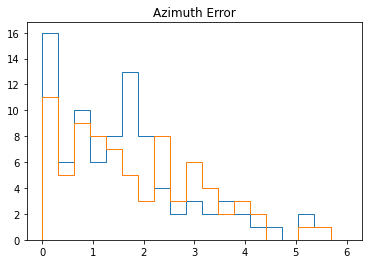

In [4022]:
plt.title("Azimuth Error")

plt.hist(pred_azimuth_deltas, np.linspace(0,6,20), histtype='step')
array =plt.hist(naive_azimuth_deltas, np.linspace(0,6,20), histtype='step')

(array([ 1.,  4., 64., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
         1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
         3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
         5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
         6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
         8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ]),
 <a list of 1 Patch objects>)

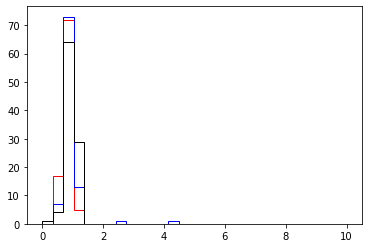

In [3954]:
plt.hist(da1.get_clusterdf()["NRMSE"], np.linspace(0,10,30), color='red', histtype='step')
plt.hist(da2.get_clusterdf()["NRMSE"],  np.linspace(0,10,30), color='blue', histtype='step')
plt.hist(mc.get_clusterdf()["NRMSE"],  np.linspace(0,10,30), color='black', histtype='step')

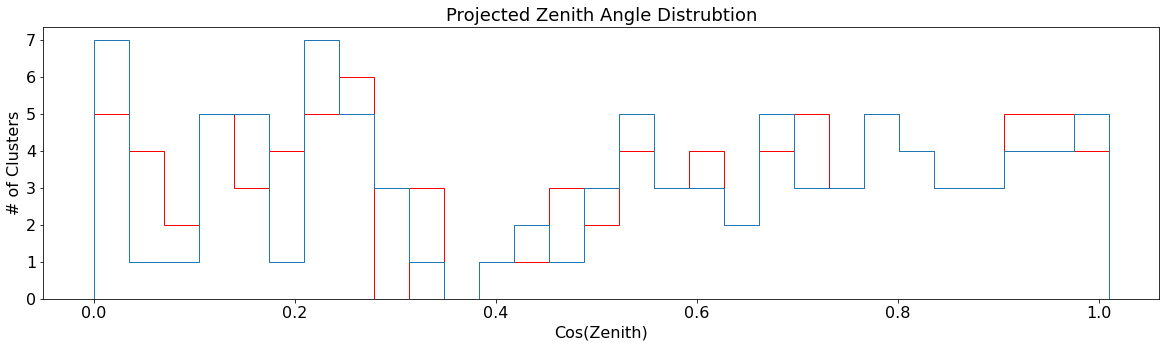

In [4026]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1.01,30), histtype='step', color='r')
array = plt.hist([math.cos(x) for x in da2.get_clusterdf()['Zenith']], np.linspace(0,1.01,30), histtype='step')




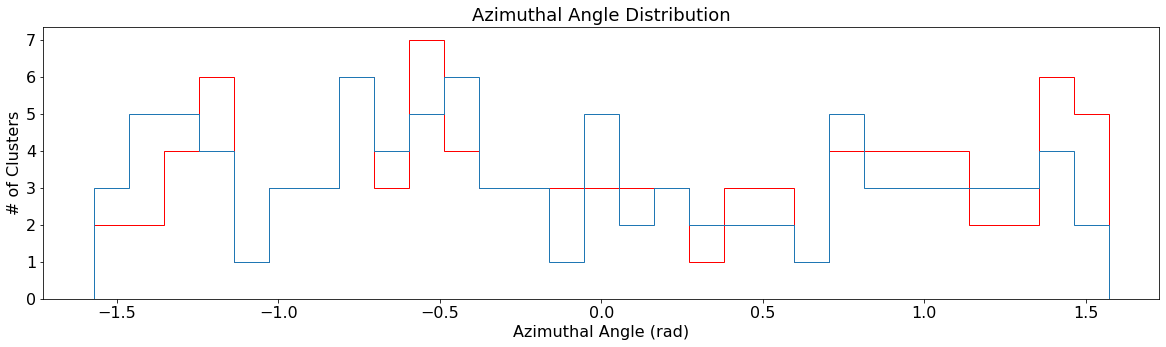

In [4027]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(mc.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,30), histtype='step', color='r')
array=plt.hist(da2.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,30), histtype='step')



In [3957]:
da1.get_clusterdf()[da1.get_clusterdf()['MissingCh'] == 0].head(10)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
3,3,8,8,136090.162061,0.0,0.711796,1.294097,-0.751455,0,0
4,4,8,8,158861.499559,0.0,0.795465,1.017602,0.869509,0,0
10,10,9,9,339484.357649,0.0,0.704239,0.794332,0.136250,0,0
11,11,5,5,340464.674985,0.0,0.880877,0.875240,-0.438561,1,0
13,13,11,11,419746.321092,0.0,0.929710,0.910498,-0.490945,1,0
14,14,7,7,464484.942365,0.0,0.743050,1.401110,1.570796,1,0
15,15,5,5,492117.413071,0.0,1.024483,0.849514,0.285413,3,0
16,16,8,8,499341.119895,0.0,0.864444,0.977100,-0.433478,0,0
17,17,10,10,560097.950405,0.0,1.067292,1.181818,-0.596230,1,0
19,19,5,5,640424.970225,0.0,0.965932,1.448530,-0.539695,2,0


In [3880]:
da2.get_clusterdf()[da2.get_clusterdf()['MissingCh'] == 0].head(10)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,5,5,24558.892431,0.0,1.043990,0.905277,1.422115,0,0
2,2,8,8,34224.207765,0.0,0.736815,0.360476,0.020403,0,0
4,4,11,11,90240.220932,0.0,0.948490,0.863518,1.407837,0,0
6,6,9,9,140059.135537,0.0,0.983427,1.401058,0.720212,0,0
7,7,9,9,171270.349214,0.0,0.712610,0.112977,-0.032546,0,0
8,8,11,11,201782.734460,0.0,0.953078,0.747458,-0.492108,1,0
9,9,6,6,207624.011470,0.0,0.835939,0.168147,-0.740849,0,0
13,13,6,6,259052.713618,0.0,1.028283,1.400621,-0.055046,0,0
14,14,7,7,266513.986287,0.0,0.870905,1.563631,-1.207717,1,0
15,15,7,7,292397.956176,0.0,0.912068,1.384997,1.150622,0,0


In [3882]:
mc.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,5,5,2.455889e+04,0.0,1.169977,0.889019,1.441251,0,0
1,1,14,14,3.243721e+04,0.0,1.024101,0.578169,-0.244438,0,0
2,2,8,8,3.422421e+04,0.0,0.740200,0.374778,0.057600,0,0
3,3,7,7,8.973810e+04,0.0,1.035510,0.980337,-0.549474,0,0
4,4,11,11,9.024022e+04,0.0,0.940383,0.861984,1.414030,0,0
...,...,...,...,...,...,...,...,...,...,...
93,93,7,7,2.612412e+06,0.0,0.921668,1.333979,-0.584844,0,0
94,94,8,8,2.693072e+06,0.0,1.038504,0.707658,-1.297928,0,0
95,95,10,10,2.707908e+06,0.0,1.029914,0.571270,-1.236098,0,0
96,96,8,8,2.739832e+06,0.0,0.900139,0.991946,-1.374786,0,0
